In [45]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
df = pd.read_csv('MERGED2011_12_PP.csv')
#display head
#df.head()

In [46]:
from sklearn.linear_model import LinearRegression
#Remove row containing a specific text
#df = df[df.MD_EARN_WNE_P6.str.contains("PrivacySuppressed") == False]

#Remove categorical columns
df=df.dropna(axis=1,how='all')
df=df.dropna(axis=0,how='all')
df = df[df.MD_EARN_WNE_P6.str.contains("PrivacySuppressed") == False]
#Change dtype to float 
df.MD_EARN_WNE_P6.astype(float)
df= df.fillna(0)
temp=df
trainingData= temp.drop('MD_EARN_WNE_P6', axis=1)
trainingData=trainingData._get_numeric_data()

#trainingData['MD_EARN_WNE_P6']= df.MD_EARN_WNE_P6

#Replace NAN with mean value
#trainingData=trainingData.fillna(0)

#Drop the target column
X= trainingData

#df.drop('MD_EARN_WNE_P6', axis=1)
lm = LinearRegression()
lm.fit(X, df.MD_EARN_WNE_P6)
print 'Number of coefficients:' ,len(lm.coef_)

Number of coefficients: 364


In [23]:
print 'Estimated intercept cofficient:' , lm.intercept_

Estimated intercept cofficient: 45327.1838876


In [47]:
pd.DataFrame(zip(X.columns, lm.coef_), columns =['Features', 'EstimatedCofficient'])

,Features,EstimatedCofficient
0,UNITID,-0.000246
1,OPEID,-0.000041
2,OPEID6,-0.016097
3,SCH_DEG,1352.159656
4,MAIN,615.243779
5,NUMBRANCH,25.536735
6,PREDDEG,1718.797090
7,HIGHDEG,450.230275
8,CONTROL,-1359.974130
9,ST_FIPS,-0.748704


In [57]:
#Plot MD_EARN_WNE_P6 & Predicted MD_EARN_WNE_P6
lm.predict(X)[0:5]

#MSE
Y=df.MD_EARN_WNE_P6
Y=Y.astype(float)
#print Y

mseFull= np.mean((Y - lm.predict(X))**2)
print mseFull

#plt.scatter(df['MD_EARN_WNE_P6'],lm.predict(X))

30615831.9729


In [73]:
X_train = X[:-1000]
X_test = X[-1000:]
Y_train = Y[:-1000]
Y_test = Y[-1000:]
print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

(5224, 364)
(1000, 364)
(5224,)
(1000,)


In [60]:
#X_train,X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,Y,test_size=0.33,random_state=5)

AttributeError: 'module' object has no attribute 'cross_validation'

In [74]:
lm = LinearRegression()
lm.fit(X_train,Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

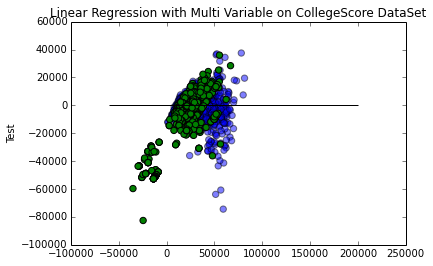

In [81]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y=0, xmin=-60000, xmax=200000)
plt.title("Linear Regression with Multi Variable on CollegeScore DataSet")
plt.ylabel("Test")

